Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[George McNinch](http://gmcninch.math.tufts.edu) <george.mcninch@tufts.edu>  
*Fall 2020*

Course material (Week 14): Example(s) for "finding model parameters"
----------------------------------------------------------------


In these notes, I want to give examples of "finding the parameters" for some models, using empirical data.

In particular, I want to revisit -- and extend in a few ways -- models we studied previously.



We considered the following:

Financial market example
=========================

Consider the state of a financial market from week to week. 

- by a *bull market* we mean a week of generally rising prices. We are going to use the label ``L`` for *bull* market.
- by a *bear market* we mean a week of genreally declining prices. We are going to use the label ``R`` for *bear* market.
- by a *recession* we mean a general slowdown of the economy. We are going to use the label ``S`` for *recession*.

We described the state using a Markov description -- let's recall that description.


Let's number the weeks we are going to consider $k=0,1,2,...$.
We can represent the probability that week $k$ is a bull market, a bear market, or in recession using a vector in $\mathbb{R}^3$:

$$\mathbf{x}^{(k)} = \begin{bmatrix}
\text{bull market prob.} \\
\text{bear market prob.} \\
\text{recession prob.}
\end{bmatrix}
=\begin{bmatrix}
x_L \\
x_R\\
x_S
\end{bmatrix}$$


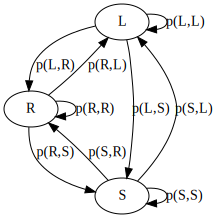

In [1]:
from graphviz import Digraph

h = Digraph()
stats = ["L","R","S"]

for s in stats:
    h.node(s)
    
for s in stats:
    for t in stats:
        h.edge(s,t,f"p({s},{t})")
h

For $(x,y) \in $ ``["L","R","S"] x ["L","R","S"]`` the quantity $p(x,y)$ represents
the probability that if the market is in state $x$ in week $t$ then the market is in state $y$ in week $t+1$.

Thus, the matrix $P = (p(x,y))$ is the transition matrix for the Markov chain corresponding to the transition diagram displayed above.


The probabilities evolve from week $k$ to week $k+1$ via the matrix

$$P = \begin{bmatrix}
p(L,L) & p(R,L) & p(S,L) \\
p(L,R) & p(R,R) & p(S,R) \\
p(L,S) & p(R,S) & p(S,S) 
\end{bmatrix};$$

i.e. $$\mathbf{x}_{k+1} = P \cdot \mathbf{x}_k.$$

Question 1
==========

How do we find the probabilities $p(x,y)$ for 

$(x,y) \in $ ``["L","R","S"] x ["L","R","S"]``?

Well, let's suppose we are given weekly state data for the financial market in question. Thus
we are given a list

```
FState = [ f0, f1, f2, f3, ... ]
```

where each ``FState[i] = fi`` $\in$ ``["L","R","S"]`` corresponds to the state during week ``i``.

Let's consider the problem of finding the values

$$p(L,L), \quad p(L,R), \quad p(L,S)$$




For this, we make a list ``IL`` of all indices ``i`` for which ``FState[i] == "L"``; let's write ``N`` for the length of the list ``FState``.

Now from the point-of-view of the given data ``FState``, the probability ``p(L,L)`` is best approximated by the ratio 

(number of indices ``i`` $\in$ ``IL`` for which ``FState[i+1] =="L"``) / ``N``.

Similarly, ``p(L,R)`` is best approximated by the ratio 

(number of indices ``i`` $\in$ ``IL`` for which ``FState[i+1] =="R"``) / ``N``. 

It should now be clear how each ``p(x,y)`` may be approximated from our empirical data.

-----------

Let's write a ``python`` function which takes as input a list ``FState`` and returns the $3 \times 3$ matrix
$P = (p(x,y))_{x,y}$.

In [2]:
import numpy as np
import numpy.linalg as la

np.set_printoptions(precision=3)

states = ["L","R","S"]

def prob_from_data(fstate):
    fstate_i = [(index,fstate[index]) for index in range(len(fstate))]
    def test_state(j,state): 
        if j>=len(fstate):
            return False
        else: 
            return fstate[j]==state
    def I(s):
        ## e.g. I("R") returns the list of indices i for which fstate[i]=="R"
        return [index for (index,f) in fstate_i if f == s]
    def J(s1,s2):
        ## if I(s1) is non-empty, return the proportion of indices i in I(s1) 
        ## for which fstate[i+1] == s1
        ## if I(s1) == [], return 1/3
        II=I(s1)
        if len(II)>0:
            J=[index for index in II if test_state(index+1,s2)]
            return 1.*len(J)/len(II)
        else:
            return 1./3    
    # I["R"] is the collection of all indices i for which fstate[i]=="R"
    # J["R"]["S"] is ratio: 
    #  #indices i for which fstate[i]=="R" & fstate[i+1]=="S"
    # over length I["R"]
    return np.array([[J(s,t) for s in states] for t in states])
        

We now consider two data-sets, each for 500 weeks.

In [3]:
fstate1 = ['R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'R',
           'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'L',
           'R', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L',
           'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
           'L', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
           'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
           'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'S', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'R', 'S', 'S', 'R', 'R', 'S', 'S', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'S',
           'S', 'S', 'S', 'S', 'L', 'R', 'S', 'S', 'S', 'L', 'L', 'L',
           'L', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
           'L', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R',
           'R', 'L', 'L', 'S', 'L', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L',
           'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'S', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'R', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'S', 'R', 'R', 'R', 'R', 'R',
           'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
           'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'S', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'R', 'R', 'R',
           'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L']

fstate2 = ['S', 'S', 'S', 'S', 'R', 'L', 'L', 'R', 'R', 'R', 'R', 'R',
           'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R',
           'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'L',
           'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'R', 'S', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R',
           'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'S',
           'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
           'L', 'R', 'R', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'L', 'L',
           'L', 'L', 'R', 'R', 'L', 'S', 'R', 'R', 'R', 'R', 'L', 'L',
           'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'S',
           'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R',
           'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'S',
           'L', 'L', 'L', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'S',
           'S', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
           'S', 'L', 'R', 'R', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'L',
           'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R',
           'S', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'R', 'S', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L',
           'L', 'L', 'L', 'S', 'S', 'S', 'S', 'R', 'R', 'R', 'R', 'R',
           'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L']


[len(fstate1),len(fstate2)]

[501, 501]

Let's compute the probabilities for these two sets of data:

In [4]:
(M1,M2)=map(prob_from_data,[fstate1,fstate2])
[M1,M2]

[array([[0.881, 0.149, 0.265],
        [0.089, 0.799, 0.235],
        [0.027, 0.052, 0.5  ]]),
 array([[0.896, 0.152, 0.333],
        [0.083, 0.773, 0.071],
        [0.018, 0.076, 0.595]])]

Question 2
==========

The empirical evidence in the above setting gives some credibility to our model -- two different data sets produced very similar matrices.

On the other hand, suppose that we had reason to believe that market behavior depended on more than just the previous weeks behavior.

There are of course other possible models. For example, perhaps taking into account the preceding two weeks does a better job of predicting  the market behavior?

-----------------

Let's consider what such a model might look like.

If week $t$ was in state $x$ and week $t+1$ was in state $y$, then we'd like to compute the probabilities
describing the possible states of week $t+2$.

There are now 9 possibilities for $x,y$; let's order them in the following way:

```
[("L","L"),("L","R"),("L","S"),
 ("R","L"),("R","R"),("R","S"),
 ("S","L"),("S","R"),("S","S")]
```

We write $p(x,y,z)$ for the probability that week $t+2$ is in state $z$ given that week $t$ was in state $x$ and week $t+1$ was in state $y$.

This leads to a $3 \times 9$ matrix $Q$, which we can compute from our state data using the following code:

In [5]:

statepairs=[("L","L"),("L","R"),("L","S"),
            ("R","L"),("R","R"),("R","S"),
            ("S","L"),("S","R"),("S","S")]

def prob_from_data_two(fstate):
    def test_state(j,state): 
        if j>=len(fstate):
            return False
        else: 
            return fstate[j]==state
    def I(s,t):
        ## e.g. I("R","S") returns the list of indices i for which fstate[i]=="R"
        ## and fstate[i+1]=="S"
        N=len(fstate)
        return [index for index in range(N-2) if fstate[index] == s and fstate[index+1]==t]
    def J(s1,s2,s3):
        ## if I(s1) is non-empty, return the proportion of indices i in I(s1) 
        ## for which fstate[i+1] == s1
        ## if I(s1) == [], return 1/3
        II=I(s1,s2)
        if len(II)>0:
            J=[index for index in II if test_state(index+2,s3)]
            return 1.*len(J)/len(II)
        else:
            return 1./3    
    # I["R"] is the collection of all indices i for which fstate[i]=="R"
    # J["R"]["S"] is ratio: 
    #  #indices i for which fstate[i]=="R" & fstate[i+1]=="S"
    # over length I["R"]
    return np.array([[J(s,t,u) for (s,t) in statepairs] for u in states])
        

In [6]:
## create the matrices

(N1,N2) = map(prob_from_data_two,[fstate1,fstate2])


In [7]:
## check that the matrices are stochastic
## this code will do nothing if things are OK, and raise an "exception" if not

def test_stoch(M):
    np.testing.assert_almost_equal(np.ones(3)@M,np.ones(9))
    
for N in [N1,N2]:
    test_stoch(N)


In [8]:
## print 

print("\n\n".join([f"{N1}",
                   f"{N2}"]))

[[0.879 0.115 0.125 0.962 0.165 0.222 0.778 0.    0.353]
 [0.089 0.808 0.5   0.038 0.784 0.111 0.222 1.    0.176]
 [0.031 0.077 0.375 0.    0.05  0.667 0.    0.    0.471]]

[[0.901 0.111 0.167 0.85  0.157 0.6   0.929 0.333 0.28 ]
 [0.082 0.815 0.167 0.1   0.765 0.    0.071 0.667 0.08 ]
 [0.017 0.074 0.667 0.05  0.078 0.4   0.    0.    0.64 ]]


How to implement "prediction" with this method?
===============================================

Note that for a $3 \times 9$ matrix $M$, we can't compute *powers* $M^j$ -- the product $M \cdot M$ isn't defined!

In order to find the probabilities for a give week, we need to know the state of the preceding two weeks.

It is pretty easy to writea ``python`` function to produce a *simulation* of the behavior of the market.


So we'll implement 
```
def Next(prob,history):
```
where we need to have

```
probe.shape == (3,9)
len(history) >= 2
```

and

```
history = [...,x1,x0]
```
where ``x1,x0`` $\in$ ``["L","R","S"]``


In [9]:
from numpy.random import default_rng

rng = default_rng()

states = ["L","R","S"]

statepairs=[("L","L"),("L","R"),("L","S"),
            ("R","L"),("R","R"),("R","S"),
            ("S","L"),("S","R"),("S","S")]

def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

def Next(prob,history):
        (x1,x0) = history[-2:]
        i = statepairs.index((x1,x0))
        return prob[:,i]
    


In [10]:
def gen_next(prob,history):
    return rng.choice(states,p=Next(prob,history))

def gen(prob,num):
    hist = [rng.choice(states),rng.choice(states)]
    for i in range(num):
        hist.append(gen_next(prob,hist[-2:]))
    return hist    
    
l=gen(N1,250)
print(l)

['R', 'L', 'L', 'S', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'S', 'S', 'S', 'S', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'S', 'S', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',


More interesting would be to produce the probability vector for a given week, given 
a $3 \times 9$ matrix together with a history list of *probability vectors*.

This would permit us to consider the question: does the probability vector approach an equilibrium state (as it does in the single-week case by the 

Assessment?
==========

The results of ``prob_from_data`` and ``prob_from_data_two`` are essentially tables of probabilities.

A possible measure of the effectiveness of our model(s) is: to what extent do different data sets result in similar
probability descriptions?

We can compute the squared norm (magnitude) of a matrix by flattening it into a vector and computing
the sum of the squares of its coefficients.  In ``python``, this flattening can be performed
by calling ``nd.ndarray.flatten(...)``

We compare the matrices obtained from the two data sets by using the squared norm (in this "flattened sense") of their difference. 

We also divide by the number of coefficients; note that for $\mathbf{v},\mathbf{w} \in \mathbb{R}^n$, the quantity $\dfrac{1}{n}\Vert \mathbf{v} - \mathbf{w}\Vert^2$ is the
average of the differences $(v_i-w_i)^2$.

In [11]:
def norm_sq(v):
    return v@v

def mat_norm_sq(M):
    return norm_sq(np.ndarray.flatten(M))

## recall that M1 and M2 were the probabilities for the respective 
## data sets, based on previous week

e1=mat_norm_sq(M1-M2)/9
e2=mat_norm_sq(N1-N2)/27
[e1,e2]

[0.004694907068603097, 0.02799503444124507]

From this computation, it appears that -- for the datea ``fstate1``and ``fstate2`` -- the model "the state of the financial market is predicted by the state of the prior week" does a better job than the second model ("the state is predicted by the prior two weeks").

Recall some optimization problems:
==================================

- oil spill cleanup (week 1)
- television manufacturing (week 2)